In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
walk_dataset = pd.read_csv('./Sample Datasets/Sample_walk_dataset_2.csv')
walk_dataset

,O,Action,X,Y,Z,Acc,TS
0,0,1,0.1,0.0,0.1,0.1,0.0
1,0,1,-0.3,0.1,0.2,0.4,0.2
2,0,1,-0.4,0.3,0.3,0.6,0.4
3,0,1,-1.6,-1.5,1.4,2.6,0.6
4,0,1,0.1,2.0,-0.3,2.0,0.8
...,...,...,...,...,...,...,...
173,0,1,1.2,2.0,0.0,2.3,33.2
174,0,1,0.5,0.6,0.5,0.9,33.4
175,0,1,-1.4,-1.4,0.0,2.0,33.6
176,0,1,0.3,-0.1,-0.5,0.6,33.8


In [40]:
run_dataset = pd.read_csv('./Sample Datasets/Sample_run_dataset_2.csv')
run_dataset = run_dataset[:1784]
run_dataset

,O,Action,X,Y,Z,Acc,TS
0,0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,-0.1,0.0,0.0,0.1,0.0
2,0,0,0.0,0.1,0.0,0.1,0.0
3,0,0,0.0,0.0,-0.1,0.1,0.1
4,0,0,0.0,0.0,0.0,0.0,0.1
...,...,...,...,...,...,...,...
1779,0,0,7.5,5.1,4.1,10.0,34.2
1780,0,0,6.2,2.5,4.5,8.1,34.2
1781,0,0,-0.7,1.4,-0.3,1.6,34.2
1782,0,0,-2.2,-5.7,8.6,10.5,34.2


run or walk? run
What type of plot? Single (S) or Multiple (M) or count spikes (CS): M


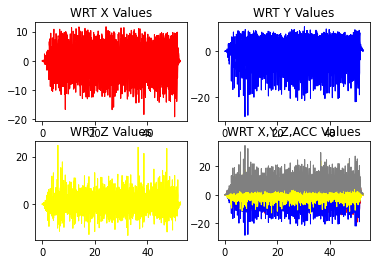

In [20]:
def count_spikes(list,TS):
    
    std_spike_val = 8
    diff_ts_spike = 1.0
    prev_spike_ts = 0.0
    counter = 0
    for idx,val in enumerate(list):
        if val >= std_spike_val and TS[idx] - prev_spike_ts >= diff_ts_spike:
            counter+=1
            prev_spike_ts = TS[idx]
        
    print(f'Number of spikes: {counter}')

def plot_one_plot():
    val = input('Which section? (X,Y,Z,Acc): ')
    if val == 'X':
        plt.plot(TS,X,color="red",linewidth=1.0)
    elif val == 'Y':
        plt.plot(TS,Y,color="red",linewidth=1.0)
    elif val == 'Z':
        plt.plot(TS,Z,color="red",linewidth=1.0)
    else:
        plt.axhline(y=12.5)
        plt.axhline(y=10)
        plt.scatter(TS,Acc,s=10,color="blue")
        plt.plot(TS,Acc,color="red",linewidth=1.0)
    plt.xlabel('Time Stamp')
    plt.ylabel('acceleration in m/s (Gravity Incl)')


def plot_sub_plots():
    figure, axis = plt.subplots(2, 2)

    axis[0,0].plot(TS,X,color="red",linewidth=1.0)
    axis[0,0].set_title("WRT X Values")

    axis[0,1].plot(TS,Y,color="blue",linewidth=1.0)
    axis[0,1].set_title("WRT Y Values")

    axis[1,0].plot(TS,Z,color="yellow",linewidth=1.0)
    axis[1,0].set_title("WRT Z Values")

    axis[1,1].plot(TS,X,color="red",linewidth=1.0)
    axis[1,1].plot(TS,Y,color="blue",linewidth=1.0)
    axis[1,1].plot(TS,Z,color="yellow",linewidth=1.0)
    axis[1,1].plot(TS,Acc,color="grey",linewidth=1.0)
    axis[1,1].set_title("WRT X,Y,Z,ACC Values")

choice = input('run or walk? ')
matrix = pd.read_csv(f'./Sample Datasets/Sample_{choice}_dataset_2.csv')
plot_type = input('What type of plot? Single (S) or Multiple (M) or count spikes (CS): ')
LR = matrix.iloc[:,[0]].values
RW = matrix.iloc[:,[1]].values
X = matrix.iloc[:,[2]].values
Y = matrix.iloc[:,[3]].values
Z = matrix.iloc[:,[4]].values
Acc = matrix.iloc[:,[5]].values
#TS_i = matrix.iloc[:,[4]].values[0]
#TS = (matrix.iloc[:,[4]].values - TS_i)/100000000
TS = matrix.iloc[:,[6]].values
if TS[0] > 100000000:
    TS = convert_ts(TS)
if plot_type == 'S':
    plot_one_plot()
elif plot_type == 'M': 
    plot_sub_plots()
else:
    count_spikes(Acc,TS=TS)
plt.show()



In [41]:
X_walk = walk_dataset.iloc[:,[2,3,4,5]]
y_walk = walk_dataset.iloc[:,[1]]
X_walk

,X,Y,Z,Acc
0,0.1,0.0,0.1,0.1
1,-0.3,0.1,0.2,0.4
2,-0.4,0.3,0.3,0.6
3,-1.6,-1.5,1.4,2.6
4,0.1,2.0,-0.3,2.0
...,...,...,...,...
173,1.2,2.0,0.0,2.3
174,0.5,0.6,0.5,0.9
175,-1.4,-1.4,0.0,2.0
176,0.3,-0.1,-0.5,0.6


In [42]:
X_run = run_dataset.iloc[:,[2,3,4,5]]
y_run = run_dataset.iloc[:,[1]]
X_run.head()

,X,Y,Z,Acc
0,0.0,0.0,0.0,0.0
1,-0.1,0.0,0.0,0.1
2,0.0,0.1,0.0,0.1
3,0.0,0.0,-0.1,0.1
4,0.0,0.0,0.0,0.0


In [43]:
X_frames = [X_walk,X_run]
X = pd.concat(X_frames)
X

,X,Y,Z,Acc
0,0.1,0.0,0.1,0.1
1,-0.3,0.1,0.2,0.4
2,-0.4,0.3,0.3,0.6
3,-1.6,-1.5,1.4,2.6
4,0.1,2.0,-0.3,2.0
...,...,...,...,...
1779,7.5,5.1,4.1,10.0
1780,6.2,2.5,4.5,8.1
1781,-0.7,1.4,-0.3,1.6
1782,-2.2,-5.7,8.6,10.5


In [45]:
Y_frames = [y_walk,y_run]
y = pd.concat(Y_frames)
y

,Action
0,1
1,1
2,1
3,1
4,1
...,...
1779,0
1780,0
1781,0
1782,0


In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [50]:
model = Sequential([
    Dense(units=16, input_shape=(4,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 690
Trainable params: 690
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(x=X,y=y, batch_size=10, epochs=30, shuffle=False,verbose=2)

Epoch 1/30
197/197 - 0s - loss: 0.2771 - accuracy: 0.8914
Epoch 2/30
197/197 - 0s - loss: 0.2266 - accuracy: 0.9093
Epoch 3/30
197/197 - 0s - loss: 0.2155 - accuracy: 0.9093
Epoch 4/30
197/197 - 0s - loss: 0.2092 - accuracy: 0.9093
Epoch 5/30
197/197 - 0s - loss: 0.2047 - accuracy: 0.9093
Epoch 6/30
197/197 - 0s - loss: 0.2008 - accuracy: 0.9093
Epoch 7/30
197/197 - 0s - loss: 0.1973 - accuracy: 0.9093
Epoch 8/30
197/197 - 0s - loss: 0.1942 - accuracy: 0.9067
Epoch 9/30
197/197 - 0s - loss: 0.1914 - accuracy: 0.9062
Epoch 10/30
197/197 - 0s - loss: 0.1888 - accuracy: 0.9057
Epoch 11/30
197/197 - 0s - loss: 0.1864 - accuracy: 0.9052
Epoch 12/30
197/197 - 0s - loss: 0.1841 - accuracy: 0.9047
Epoch 13/30
197/197 - 0s - loss: 0.1819 - accuracy: 0.9042
Epoch 14/30
197/197 - 0s - loss: 0.1798 - accuracy: 0.9027
Epoch 15/30
197/197 - 0s - loss: 0.1778 - accuracy: 0.9021
Epoch 16/30
197/197 - 0s - loss: 0.1758 - accuracy: 0.9006
Epoch 17/30
197/197 - 0s - loss: 0.1739 - accuracy: 0.8986
Epoch 